# COVARIANCE MATRIX

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pkl
from scipy.spatial.distance import cdist

In [2]:
path = '/home/giuseppe/src/cmans/experiment_data/'

controller = 'dmp'
fit_path = os.path.join(path, 'Walker2D_FitNS_std/{}'.format(controller))
cmans_path = os.path.join(path, 'Walker2D_CMA-NS_std/{}'.format(controller))

In [3]:
with open(os.path.join(fit_path, 'data.pkl'), 'rb') as f:
    fit_data = pkl.load(f)
    
with open(os.path.join(cmans_path, 'data.pkl'), 'rb') as f:
    cmans_data = pkl.load(f)

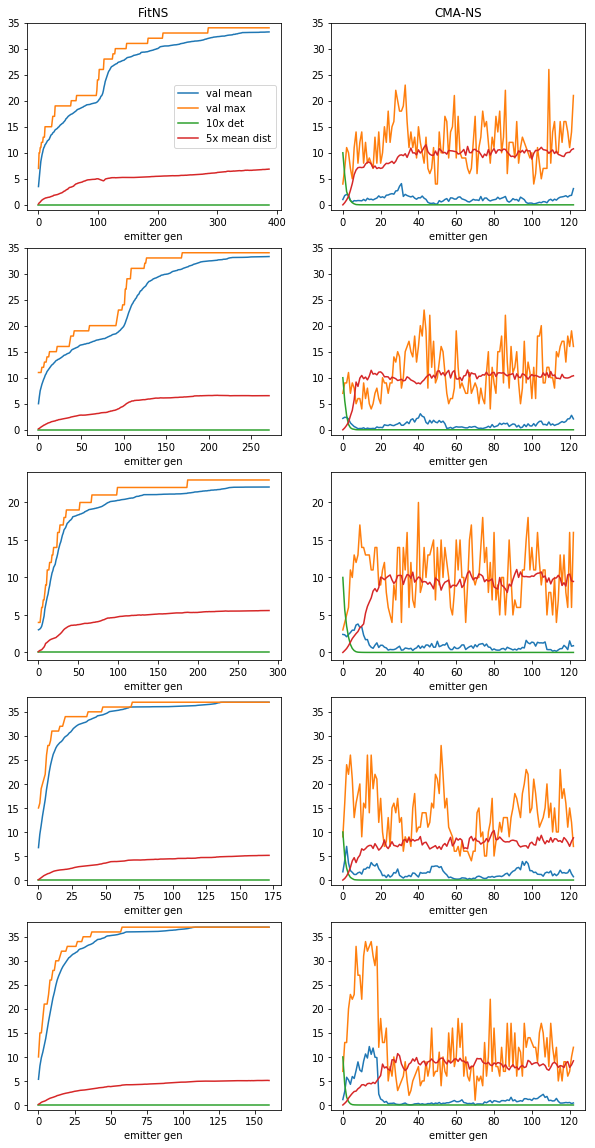

In [4]:
# plt.style.use('seaborn-notebook')
figure, axes = plt.subplots(len(fit_data), 2, figsize=(10, 20))

for idx, fit_emit in zip(range(len(fit_data)), fit_data):
    cmans_emit = fit_emit
    fit_steps = list(range(len(fit_data[fit_emit]['MEAN'])))
    fit_mean = np.array(fit_data[fit_emit]['MEAN'])
    fit_cov = fit_data[fit_emit]['COV']
    fit_det = np.array([np.linalg.det(C) for C in fit_cov])
    fit_values = fit_data[fit_emit]['VAL']
    fit_eig = np.max(np.array([np.linalg.eig(C)[0] for C in fit_cov]), axis=1)
    fit_parent = fit_data[fit_emit]['PAR']
    fit_distance = cdist(np.array([fit_parent]), fit_mean)[0]
    
    cmans_steps = list(range(len(cmans_data[cmans_emit]['MEAN'])))
    cmans_mean = np.array(cmans_data[cmans_emit]['MEAN'])
    cmans_cov = cmans_data[cmans_emit]['COV']
    cmans_det = np.array([np.linalg.det(C) for C in cmans_cov])
    cmans_values = cmans_data[cmans_emit]['VAL']
    cmans_eig = np.max(np.array([np.linalg.eig(C)[0] for C in cmans_cov]), axis=1)
    cmans_parent = cmans_data[cmans_emit]['PAR']
    cmans_distance = cdist(np.array([cmans_parent]), cmans_mean)[0]

    assert all(cmans_parent == fit_parent), 'CMANS and FIT have different parents. \n CMANS: {} \n FIT: {}'.format(cmans_parent, fit_parent)

    
    axes[idx][0].plot(fit_steps, np.mean(fit_values, axis=1), label='val mean')
    axes[idx][0].plot(fit_steps, np.max(fit_values, axis=1), label='val max')
    axes[idx][0].plot(fit_steps, 10*fit_det, label='10x det')
#     axes[idx][0].plot(fit_steps, fit_eig, label='eig max')
    axes[idx][0].plot(fit_steps, 5*fit_distance, label='5x mean dist')

    
    axes[idx][1].plot(cmans_steps, np.mean(cmans_values, axis=1), label='val mean')
    axes[idx][1].plot(cmans_steps, np.max(cmans_values, axis=1), label='val max')
    axes[idx][1].plot(cmans_steps, 10*cmans_det, label='10x det')
#     axes[idx][1].plot(cmans_steps, cmans_eig, label='eig max')
    axes[idx][1].plot(cmans_steps, 5*cmans_distance, label='5x mean dist')


    
    ylim = np.max([np.max(10*cmans_det), 
                   np.max(10*fit_det), 
                   np.max(fit_values), 
                   np.max(cmans_values),
                   np.max(fit_eig),
                   np.max(cmans_eig),
                   np.max(5*cmans_distance),
                   np.max(5*fit_distance)
                  ])+1
    
    axes[idx][0].set_ylim(-1, ylim)
    axes[idx][1].set_ylim(-1, ylim)
    axes[idx][0].set_xlabel('emitter gen')
    axes[idx][1].set_xlabel('emitter gen')


    
axes[0][0].legend()
# axes[0][1].legend()
axes[0][0].set_title('FitNS')
axes[0][1].set_title('CMA-NS')
figure.patch.set_facecolor('white')

plt.show();

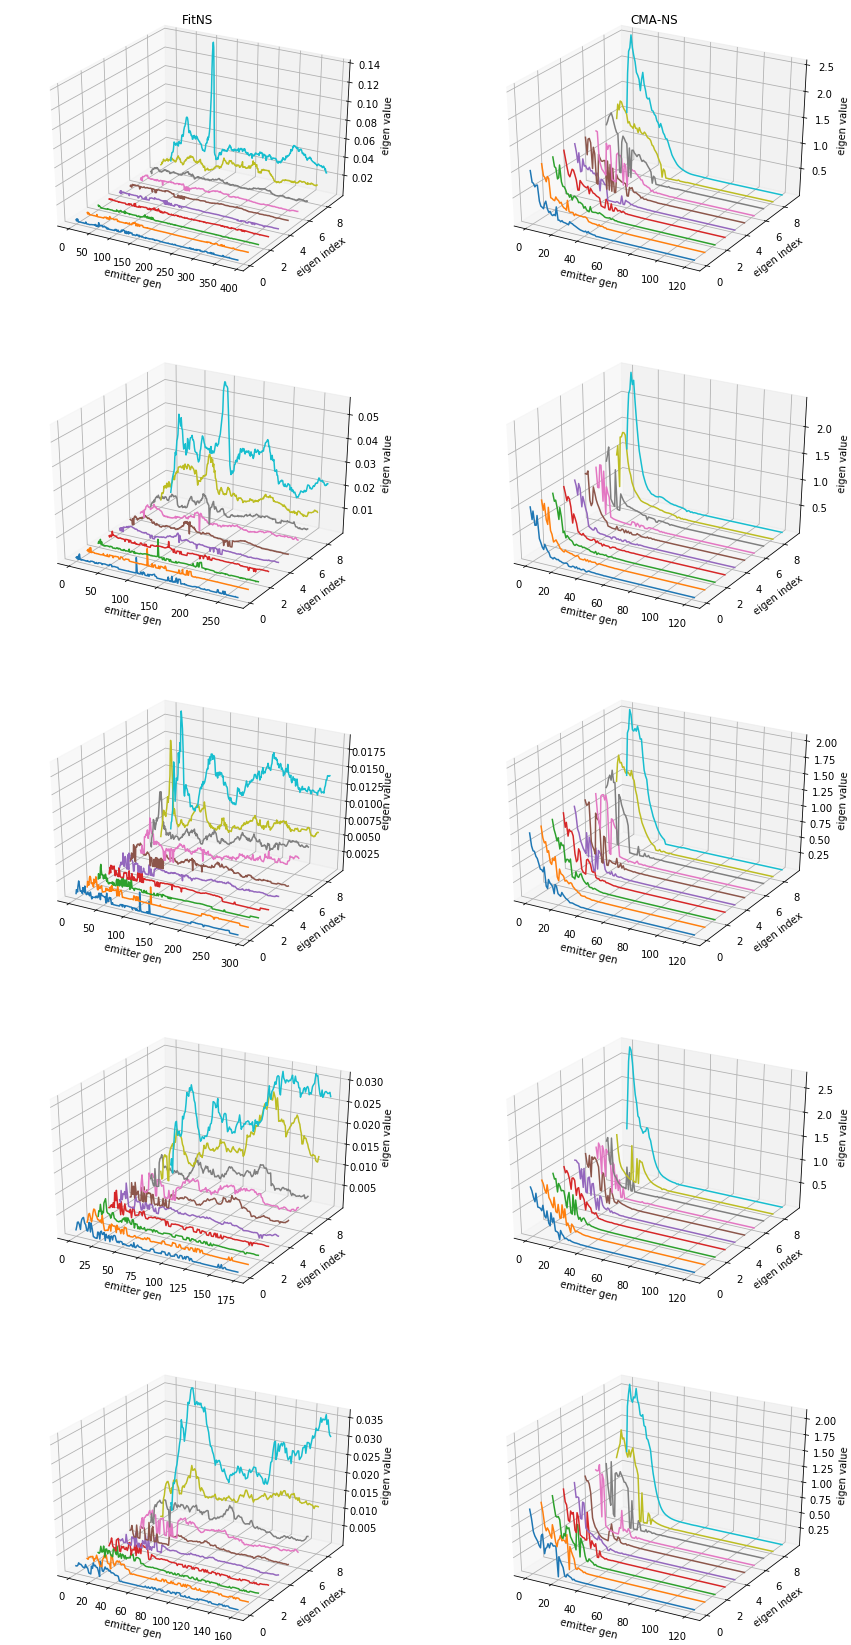

In [6]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

figure, axes = plt.subplots(len(fit_data), 2, figsize=(15, 30), subplot_kw={'projection': '3d'})

for idx, fit_emit in zip(range(len(fit_data)), fit_data):
    cmans_emit = fit_emit

    fit_steps = list(range(len(fit_data[fit_emit]['MEAN'])))
    fit_cov = fit_data[fit_emit]['COV']
    fit_eig = np.array([np.linalg.eig(C)[0] for C in fit_cov])
    
    for i, eig in enumerate(fit_eig.transpose()[::-1]):
        axes[idx][0].plot(fit_steps, [i]*len(fit_steps), eig)
    
    cmans_steps = list(range(len(cmans_data[cmans_emit]['MEAN'])))
    cmans_cov = cmans_data[cmans_emit]['COV']
    cmans_eig = np.array([np.linalg.eig(C)[0] for C in cmans_cov])
    
    for i, eig in enumerate(cmans_eig.transpose()[::-1]):
        axes[idx][1].plot(cmans_steps, [i]*len(cmans_steps), eig)
        
    axes[idx][0].set_xlabel('emitter gen')
    axes[idx][1].set_xlabel('emitter gen')
    axes[idx][0].set_ylabel('eigen index')
    axes[idx][1].set_ylabel('eigen index')
    axes[idx][0].set_zlabel('eigen value')
    axes[idx][1].set_zlabel('eigen value')
    
axes[0][0].set_title('FitNS')
axes[0][1].set_title('CMA-NS')
figure.patch.set_facecolor('white')

plt.show();  